# Search and Download Sentinel 2 imagery using Sentinelsat API

Make sure all the libraries are installed below. Use conda if possible <br>
For Sentinelsat use <br>
<br>pip install sentinelsat 
<br>
<br>
At the conda prompt or at the cmd prompt

### Getting help
refer to the following links
<br>
sentinelsat git hub - https://github.com/sentinelsat/sentinelsat
<br>
sentinelsat API docs - https://sentinelsat.readthedocs.io/en/stable/api.html
<br>
<br>
virtually everything you will see here has been borrowed or adpated from here, I've just added a bit of folium and unzipping

### Import libraries

In [1]:
!pip install geopandas
!pip install sentinelsat

     |████████████████████████████████| 994 kB 12.5 MB/s 
     |████████████████████████████████| 15.4 MB 33 kB/s 
     |████████████████████████████████| 6.3 MB 38.2 MB/s 
     |████████████████████████████████| 48 kB 3.9 MB/s 


In [2]:
import numpy as np
import geopandas as gpd
import folium
from sentinelsat.sentinel import SentinelAPI, read_geojson, geojson_to_wkt
import matplotlib.pyplot as plt

### Plot a boundary in WGS 84 EPSG code 4326 on a folium slipping map

In [3]:
m = folium.Map([-18.6696553, 35.5273354], zoom_start=10) #mozambique
boundsdata = '/content/map (5).geojson'
folium.GeoJson(boundsdata).add_to(m)
m

### Connect to the API using a username and password - if you don't have these set one up on scihub

In [4]:
# connect to the API
user = 'nyirahakiza' ## change this!
password = 'qwertyui' ## change this!

api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')

In [5]:
# search by polygon
footprint = geojson_to_wkt(read_geojson(boundsdata))

print (footprint)

GEOMETRYCOLLECTION(POLYGON((34.5410 -11.4370,30.4102 -15.1994,31.3770 -22.2688,32.1680 -26.2737,35.5957 -23.5640,40.7812 -14.8598,40.4297 -10.6606,34.5410 -11.4370)))


### Search
Search for images that fall with the date range 25th Feb 2019 - 27 Feb 2019, we want sentinel 2 level2A and cloud cover of 0-20%

In [6]:
products = api.query(footprint,
                     date = ('20190225', '20190227'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-2A',
                     cloudcoverpercentage = (0, 20))

In [7]:
print(len(products))

55


Show results in a table

In [8]:
product = api.to_geodataframe(products)
products_gdf_sorted = product.sort_values(['cloudcoverpercentage'], ascending=[True])
products_gdf_sorted

,title,link,link_alternative,link_icon,summary,ondemand,ingestiondate,beginposition,endposition,orbitnumber,relativeorbitnumber,cloudcoverpercentage,highprobacloudspercentage,mediumprobacloudspercentage,notvegetatedpercentage,snowicepercentage,unclassifiedpercentage,vegetationpercentage,waterpercentage,filename,format,identifier,instrumentshortname,instrumentname,s2datatakeid,platformidentifier,orbitdirection,platformserialidentifier,processingbaseline,processinglevel,producttype,platformname,size,uuid,geometry
a4d6f5fc-4573-4dbe-af6d-48ccabe62629,S2A_MSIL2A_20190225T072901_N0211_R049_T36LYK_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-02-25T07:29:01.025Z, Instrument: MS...",false,2019-02-25 17:32:23.601,2019-02-25 07:29:01.025,2019-02-25 07:29:01.025,19208,49,0.001688,0.000620,0.001068,2.475752,0.000000,0.090516,97.352284,0.007114,S2A_MSIL2A_20190225T072901_N0211_R049_T36LYK_2...,SAFE,S2A_MSIL2A_20190225T072901_N0211_R049_T36LYK_2...,MSI,Multi-Spectral Instrument,GS2A_20190225T072901_019208_N02.11,2015-028A,DESCENDING,Sentinel-2A,02.11,Level-2A,S2MSI2A,Sentinel-2,418.04 MB,a4d6f5fc-4573-4dbe-af6d-48ccabe62629,"POLYGON ((35.39635 -14.54844, 35.41536 -14.469..."
b29f9b48-0df8-4869-8bd6-3da24949a881,S2A_MSIL2A_20190225T072901_N0211_R049_T36KXG_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-02-25T07:29:01.025Z, Instrument: MS...",false,2019-02-25 17:29:26.873,2019-02-25 07:29:01.025,2019-02-25 07:29:01.025,19208,49,0.002905,0.000613,0.002291,1.899887,0.000000,0.156046,93.827617,3.726706,S2A_MSIL2A_20190225T072901_N0211_R049_T36KXG_2...,SAFE,S2A_MSIL2A_20190225T072901_N0211_R049_T36KXG_2...,MSI,Multi-Spectral Instrument,GS2A_20190225T072901_019208_N02.11,2015-028A,DESCENDING,Sentinel-2A,02.11,Level-2A,S2MSI2A,Sentinel-2,139.64 MB,b29f9b48-0df8-4869-8bd6-3da24949a881,"POLYGON ((34.74471 -17.26536, 34.77575 -17.134..."
1addc41a-f8ee-4c98-b47e-4b37e6f9a7d0,S2A_MSIL2A_20190225T072901_N0211_R049_T36KYF_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-02-25T07:29:01.025Z, Instrument: MS...",false,2019-02-25 17:30:55.576,2019-02-25 07:29:01.025,2019-02-25 07:29:01.025,19208,49,0.017034,0.006141,0.010892,3.066272,0.000000,0.125282,94.746786,1.515603,S2A_MSIL2A_20190225T072901_N0211_R049_T36KYF_2...,SAFE,S2A_MSIL2A_20190225T072901_N0211_R049_T36KYF_2...,MSI,Multi-Spectral Instrument,GS2A_20190225T072901_019208_N02.11,2015-028A,DESCENDING,Sentinel-2A,02.11,Level-2A,S2MSI2A,Sentinel-2,1.08 GB,1addc41a-f8ee-4c98-b47e-4b37e6f9a7d0,"POLYGON ((34.88004 -17.17569, 35.91159 -17.163..."
5cfa4857-6008-42cb-ba4c-2e28604721c7,S2A_MSIL2A_20190225T072901_N0211_R049_T36KYG_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-02-25T07:29:01.025Z, Instrument: MS...",false,2019-02-25 17:32:57.227,2019-02-25 07:29:01.025,2019-02-25 07:29:01.025,19208,49,0.086851,0.059074,0.027777,2.860582,0.000000,0.195264,95.707291,0.555632,S2A_MSIL2A_20190225T072901_N0211_R049_T36KYG_2...,SAFE,S2A_MSIL2A_20190225T072901_N0211_R049_T36KYG_2...,MSI,Multi-Spectral Instrument,GS2A_20190225T072901_019208_N02.11,2015-028A,DESCENDING,Sentinel-2A,02.11,Level-2A,S2MSI2A,Sentinel-2,1.08 GB,5cfa4857-6008-42cb-ba4c-2e28604721c7,"POLYGON ((34.87557 -16.71741, 34.88224 -16.690..."
9cafd398-b42a-44db-9951-2c1a4cc04e76,S2A_MSIL2A_20190225T072901_N0211_R049_T37KBB_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-02-25T07:29:01.025Z, Instrument: MS...",false,2019-02-25 17:33:59.642,2019-02-25 07:29:01.025,2019

Plot the table as a GeoPandas dataframe, based on the uuid field

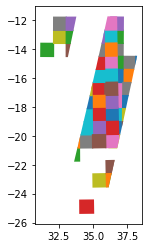

In [10]:
areas = api.to_geodataframe(products)
areas.plot(column='uuid', cmap=None)

Label these polygons

842a50c5-f15c-442e-948d-cb48230f49ef    Annotation(33.1436, -13.9975, '842a50c5-f15c-4...
3d2172a6-bb15-4f08-89a8-b43a514e3e9e    Annotation(31.6562, -14.0609, '3d2172a6-bb15-4...
b5fab413-149f-422f-9fd0-5c2e6bac8f33    Annotation(32.5835, -13.1599, 'b5fab413-149f-4...
39fc7540-d771-4d01-941b-048b1f2c35a0    Annotation(33.2411, -13.1215, '39fc7540-d771-4...
b01923cb-4105-4e4e-9c6d-0e8e0a4ad734    Annotation(32.585, -12.2555, 'b01923cb-4105-4e...
6a3795d7-5890-448c-b3b5-930bf09f2d0c    Annotation(33.3397, -12.2285, '6a3795d7-5890-4...
a67b352e-6aa7-42ab-9dae-a2abf4b3330f    Annotation(36.7302, -14.054, 'a67b352e-6aa7-42...
a8ea0d7b-faa7-4e5d-96d4-2ef44a97b4eb    Annotation(37.6212, -14.9483, 'a8ea0d7b-faa7-4...
42968021-d20a-4a40-a651-30006f5e11eb    Annotation(36.7388, -13.1503, '42968021-d20a-4...
6d36ca7a-51bc-4c08-9bad-9e479a30d211    Annotation(36.7468, -12.2466, '6d36ca7a-51bc-4...
1b457c27-ae38-4326-af11-8d5697dae445    Annotation(37.5207, -15.8448, '1b457c27-ae38-4...
172a692a-0

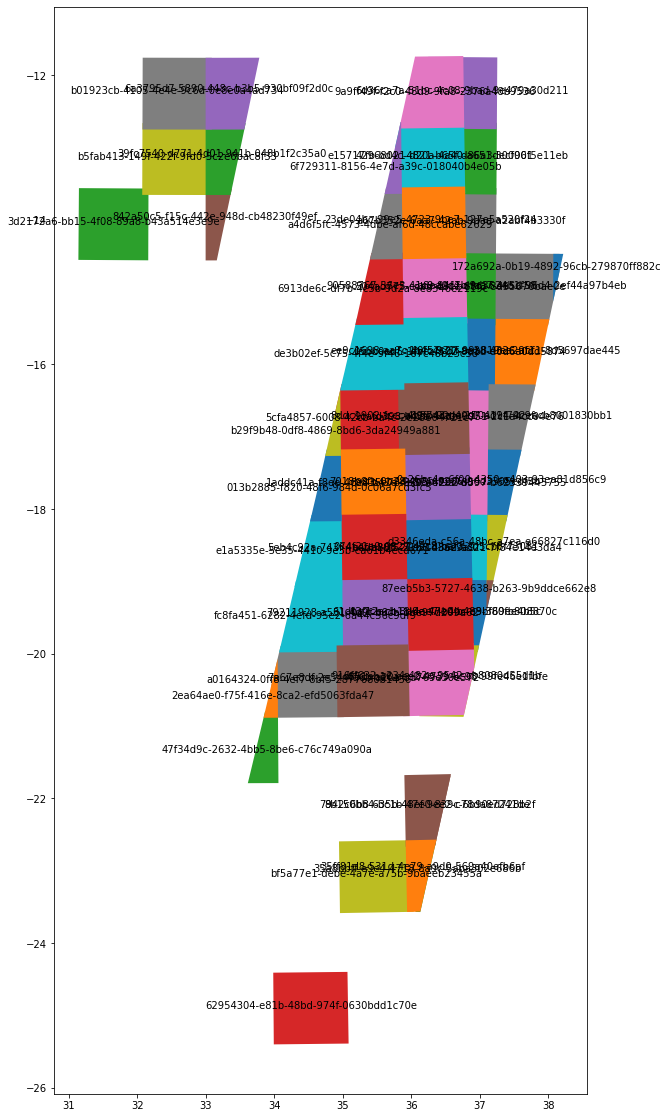

In [11]:
ax = areas.plot(column='uuid', cmap=None, figsize=(20, 20))
areas.apply(lambda x: ax.annotate(s=x.uuid, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

### Inspect vs our bounds
use geopandas to check which scene to download

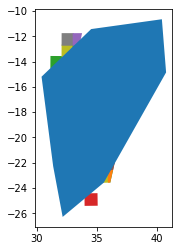

In [12]:
gdf2 = gpd.read_file(boundsdata)
f, ax = plt.subplots(1)
areas.plot(ax=ax,column='uuid',cmap=None,)
gdf2.plot(ax=ax)
plt.show()

### Get the uuid and inspect produuct data

In [13]:
api.get_product_odata('a0164324-0ff8-4ef7-8bf5-2877680b1456')

{'Creation Date': datetime.datetime(2019, 2, 25, 17, 43, 10, 60000),
 'Ingestion Date': datetime.datetime(2019, 2, 25, 17, 30, 50, 266000),
 'Online': False,
 'date': datetime.datetime(2019, 2, 25, 7, 29, 1, 25000),
 'footprint': 'POLYGON((33.958634222949755 -20.432898552720715,33.96972722324212 -20.38887063787472,34.00682043835525 -20.24107053186016,34.0437769945673 -20.093253937318483,34.080447501445754 -19.945408857209888,34.09377316071787 -19.892170242754606,35.00386329474738 -19.88460513746159,35.016717793692855 -20.8761766614061,33.9614310066608 -20.88536609449597,33.958634222949755 -20.432898552720715))',
 'id': 'a0164324-0ff8-4ef7-8bf5-2877680b1456',
 'md5': '7510EE2E7B9D335801AFE0F251A402D7',
 'quicklook_url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('a0164324-0ff8-4ef7-8bf5-2877680b1456')/Products('Quicklook')/$value",
 'size': 1102100209,
 'title': 'S2A_MSIL2A_20190225T072901_N0211_R049_T36KXC_20190225T102845',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/

## Download the data

In [17]:
api.download_all(products)# to download all available online products at once

Fetching archival status:   5%|5         | 3/55 [00:02<00:50,  1.04product/s]

LTA retrieval:   0%|          | 0/24 [00:00<?, ?product/s]

MD5 checksumming:   0%|          | 0.00/76.1M [00:00<?, ?B/s]

MD5 checksumming:   0%|          | 0.00/731M [00:00<?, ?B/s]

MD5 checksumming:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

MD5 checksumming:   0%|          | 0.00/1.16G [00:00<?, ?B/s]

MD5 checksumming:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

MD5 checksumming:   0%|          | 0.00/347M [00:00<?, ?B/s]

MD5 checksumming:   0%|          | 0.00/146M [00:00<?, ?B/s]

MD5 checksumming:   0%|          | 0.00/1.14G [00:00<?, ?B/s]

MD5 checksumming:   0%|          | 0.00/978M [00:00<?, ?B/s]

MD5 checksumming:   0%|          | 0.00/162M [00:00<?, ?B/s]

MD5 checksumming:   0%|          | 0.00/366M [00:00<?, ?B/s]

MD5 checksumming:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

MD5 checksumming:   0%|          | 0.00/589M [00:00<?, ?B/s]

MD5 checksumming:   0%|          | 0.00/956M [00:00<?, ?B/s]

MD5 checksumming:   0%|          | 0.00/911M [00:00<?, ?B/s]

MD5 checksumming:   0%|          | 0.00/1.16G [00:00<?, ?B/s]

MD5 checksumming:   0%|          | 0.00/1.13G [00:00<?, ?B/s]

MD5 checksumming:   0%|          | 0.00/1.15G [00:00<?, ?B/s]

MD5 checksumming:   0%|          | 0.00/934M [00:00<?, ?B/s]

MD5 checksumming:   0%|          | 0.00/1.15G [00:00<?, ?B/s]

MD5 checksumming:   0%|          | 0.00/1.14G [00:00<?, ?B/s]

MD5 checksumming:   0%|          | 0.00/346M [00:00<?, ?B/s]

MD5 checksumming:   0%|          | 0.00/449M [00:00<?, ?B/s]

MD5 checksumming:   0%|          | 0.00/1.16G [00:00<?, ?B/s]

MD5 checksumming:   0%|          | 0.00/1.14G [00:00<?, ?B/s]

KeyboardInterrupt: ignored

In [ ]:
#api.download('a0164324-0ff8-4ef7-8bf5-2877680b1456')

Get the path name so we can unzip

In [ ]:
#path_tozip = Out[12]['path'] ##notebook way - will not work in standalone script

Unzip using code found on stackoverflow
<br>
<br>
https://stackoverflow.com/questions/3451111/unzipping-files-in-python

In [ ]:
!unzip "/content/S2A_MSIL2A_20190225T072901_N0211_R049_T36KWB_20190225T102845.zip" -d"content" # unzip any product you want

In [ ]:
# import zipfile # https://stackoverflow.com/questions/3451111/unzipping-files-in-python
# zip_ref = zipfile.ZipFile(path_tozip, 'r')
# zip_ref.extractall(r'D:\sentinelsat')
# zip_ref.close()

The data is now downloaded, and unzipped and waiting for you to work with it. There are plenty of things you can do with Satellite imagery for inspiration take a look at my website www.acgeospatial.co.uk

<br>
<br>
I offer training in Geospatial Python programming contact me info@acgeospatial.co.uk
